# Business problem

In [ ]:
Case Study: Eniac’s Discount Strategy, E-commerce tech company, internal data.
Debate: whether it’s beneficial to discount products.
Marketing Team Lead: discounts beneficial in long run: improve customer acquisition, satisfaction and retention, and allow company to grow.
Investors worried about offering aggressive discounts: company's quarterly results showed increase in orders placed, but decrease in the total revenue, refer that company positions itself in quality segment, rather than competing to offer lowest prices.

SyntaxError: invalid character '’' (U+2019) (ipython-input-4250021278.py, line 1)

# business questions

In [ ]:
How should products be classified into different categories to simplify reports and analysis?

In [ ]:
What is the distribution of product prices across different categories?

In [ ]:
How many products are being discounted?

In [ ]:
How big are the offered discounts as a percentage of the product prices?

In [ ]:
How do seasonality and special dates (Christmas, Black Friday) affect sales?

In [ ]:
How could data collection be improved?

In [ ]:
data cleaning -> data usable & trustable — with necessary disclaimers

SyntaxError: invalid character '—' (U+2014) (ipython-input-1271920323.py, line 1)

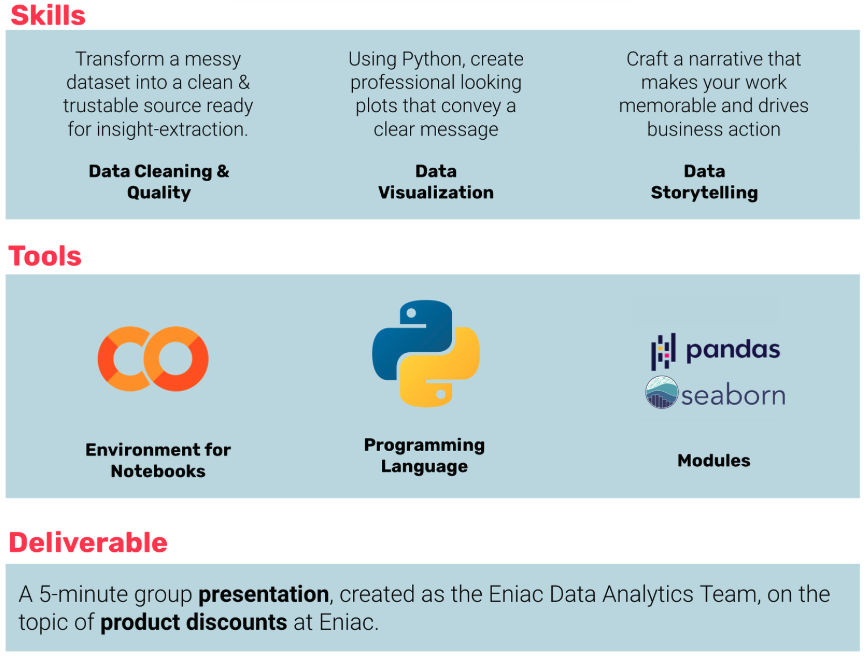

In [ ]:
create own cheat sheet (from notebooks?) to help structure knowledge

In [ ]:
know what’s possible to do with library like pandas and where can go back and find this information when you need it

# Initial exploration: 4 common steps Data Analysts take on any dataset.

In [ ]:
Get the info: read data -> DataFrame.info(): rows (“entries”), columns, null values, data type of each column.
Should any column be numeric, but pandas read as object? why this happened?
no fixing: take note & explore -> big picture of dataset —> cleaning &transforming

In [ ]:
Raw data: getting sense of data
DataFrame.head(); Play with its n argument to visualise more rows. I
DataFrame.tail(), sometimes last rows of a DataFrame have weird stuff in them.
Sometimes detecting problems in data that otherwise remain undetected: strings with special characters not read properly, missing data encoded as empty string (“-” or “NA” are typical too), information clearly wrong…

In [ ]:
Quick tricks: other functions and methods to explore (+check docs, pandas user guide):
DataFrame.describe() -> basic numerical aggregations; +applied to single column
DataFrame.isna().any() -> which columns contain missing data
DataFrame.shape -> the number of rows and columns
DataFrame.columns -> column names; list with new names can be passed to this attribute to rename the columns.
DataFrame.columnName.isna().sum() -> number of missing values in a column
DataFrame.columnName.value_counts() -> summarise categorical column: how many orders are completed, cancelled, pending…
DataFrame.columnName.hist() -> plot histogram in a numerical column; bins argument to change granularity of the graph.

In [ ]:
Custom exploration: look at data and ask oneself: “what need to know about it?” -> questions:
How many orders are there? How many products are there?
What period of time do these orders comprise?
How many orders are Completed? How should revenue be computed?…
As go through these questions, normal to detect issues with data, like numbers not read as numbers. blocking from progressing, move on to next lesson in platform.

In [ ]:
Cleaning products
serious issues, especially with price. steps to take to have a dataset can work with.

different (or more) steps, free to do it. document, explain decisions.

1. Remove duplicate rows
DataFrame.drop_duplicates() # to remove rows that contain  same values across all columns. argument inplace=True -> changes  take place.
before & after running this code with len(): how many rows were dropped this way.
duplicate sku, should not have —Stock Keeping Units are meant to be unique.

2. Deal with products with two dots in price (“304.223.23”). several options:
- corrupted with rule that can reverse-engineer, fix prices!
Otherwise, alter all the analysis. can drop all rows with this anomaly. documenting issue and when present results, include big disclaimer warning about this.
-strings -> python’s string methods (user guide for some examples, summary of string methods); Regular Expressions.

3. weird numbers: prices (e.g. 99.004). realistic for products they correspond to? just rounded to 2 decimal places?
boolean indexing with .loc + string method to filter rows with just these products, explore and make a final call: keep or remove rows?

4. missing values in the product prices and decide strategy for dealing :
reason by which missing (e.g. products not belong to the catalogue and never sold), act in consequence ( drop them using Series.dropna).
imputation method that: fill with good estimate of their price (e.g. the mean price for products of their same brand), (Series.fillna() + indexing method such as .loc).
can not find any explanation or imputation method, drop for now and come back here in another iteration of your analysis. Do not lose too much time!

5. Change prices to numeric to discover how cheap or expensive Eniac’s products are.

SyntaxError: invalid character '—' (U+2014) (ipython-input-1848393183.py, line 10)

# import pandas as pd

In [ ]:
import pandas as pd

# products.csv

In [ ]:
# products.csv
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)
products

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


In [ ]:
products.csv
sku – stock keeping unit: a unique identifier for each product
name – product name
desc – product description
price – base price of the product, in euros
promo_price – promotional price, in euros
in_stock – whether or not the product was in stock at the moment of the data extraction
type – a numerical code for product type

SyntaxError: invalid character '–' (U+2013) (ipython-input-3902593158.py, line 2)

# orders.csv

In [ ]:
# orders.csv
url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path) # orders = pd.read_csv(path_orders, parse_dates=["created_date"]), parse_dates converts into datetime type

In [ ]:
orders.csv – Every row in this file represents an order.
order_id – a unique identifier for each order
created_date – a timestamp for when the order was created
total_paid – the total amount paid by the customer for this order, in euros
state
“Shopping basket” – products have been placed in the shopping basket
“Place Order” – the order has been placed, but is awaiting shipment details
“Pending” – the order is awaiting payment confirmation
“Completed” – the order has been placed and paid, and the transaction is completed.
“Cancelled” – the order has been cancelled and the payment returned to the customer.

SyntaxError: invalid character '–' (U+2013) (ipython-input-2130937130.py, line 1)

# orderlines.csv

In [ ]:
# orderlines.csv
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path) # orderlines = pd.read_csv(path_orderlines, parse_dates=["date"])

In [ ]:
orderlines.csv – Every row represents each one of the different products involved in an order.
id – a unique identifier for each row in this file
id_order – corresponds to orders.order_id
product_id – an old identifier for each product, nowadays not in use
product_quantity – how many units of that product were purchased on that order
sku – stock keeping unit: a unique identifier for each product
unit_price – the unitary price (in euros) of each product at the moment of placing that order
date – timestamp for the processing of that product

SyntaxError: invalid character '–' (U+2013) (ipython-input-2413270060.py, line 1)

# brands.csv

In [ ]:
# brands.csv
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)
brands

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


In [ ]:
brands.csv
short – the 3-character code by which the brand can be identified in the first 3 characters of products.sku
long – brand name

SyntaxError: invalid character '–' (U+2013) (ipython-input-2618616759.py, line 2)

# Products table cleaning

In [ ]:
orders_df = orders.copy()
orderlines_df = orderlines.copy()
products_df = products.copy()
brands_df = brands.copy()

In [ ]:
orders_df.duplicated().sum()
orderlines_df.duplicated().sum()
products_df.duplicated().sum()
brands_df.duplicated().sum()

# Inspect data

# .info

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
missing values in total_paid

In [ ]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
Missing values (NaN) in important columns (price, promo_price, sku)
Wrong data types (price, promo_price, sku)
Duplicates (sku should be unique)

In [ ]:
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


# .head

In [ ]:
products_df.head()

,sku,name,desc,price,promo_price,in_stock,type
count,10579,10579,10572,10534,10579,10579.000000,10529
unique,10579,10373,7098,2690,4614,NaN,126
top,THU0063,Synology DS216 + II | Seagate 4TB IronWolf for...,NAS server of the Plus Series for companies se...,29.99,299.899,NaN,11865403
freq,1,13,56,290,179,NaN,1092
mean,NaN,NaN,NaN,NaN,NaN,0.194158,NaN
std,NaN,NaN,NaN,NaN,NaN,0.395570,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [ ]:
products.describe(include="all")

# .isna

In [ ]:
orders_df.isna().sum()



,0
order_id,0
created_date,0
total_paid,5
state,0


In [ ]:
orderlines_df.isna().sum()

,0
id,0
id_order,0
product_id,0
product_quantity,0
sku,0
unit_price,0
date,0


In [ ]:
products_df.isna().sum()


,0
sku,0
name,0
desc,7
price,46
promo_price,0
in_stock,0
type,50


In [ ]:
brands_df.isna().sum()

,0
short,0
long,0


# Remove Duplicates


In [ ]:
products = products_df.drop_duplicates(subset="sku") # sku is unique product identifier -> duplicates could cause double-counting
brands = brands.drop_duplicates(subset="short")

# Convert Data Types

In [ ]:
products["price"] = pd.to_numeric(products_df["price"], errors="coerce") # errors="coerce" converts invalid entries to NaN
products["promo_price"] = pd.to_numeric(products_df["promo_price"], errors="coerce")
products["type"] = pd.to_numeric(products_df["type"], errors="coerce")
products["in_stock"] = products_df["in_stock"].astype(bool)

orders["total_paid"] = pd.to_numeric(orders_df["total_paid"], errors="coerce")

orderlines["unit_price"] = pd.to_numeric(orderlines_df["unit_price"], errors="coerce")
orderlines["product_quantity"] = pd.to_numeric(orderlines_df["product_quantity"], errors="coerce")

# Handle missing values

In [ ]:
products = products.dropna(subset=["sku", "price"]) # Discount analysis needs valid price - Drop rows with missing price; Defensive / best-practice coding: Today no missing values, Tomorrow file might change

orders = orders.dropna(subset=["total_paid", "created_date"]) # Drop orders with missing total_paid

orderlines = orderlines.dropna(subset=["sku", "unit_price", "product_quantity"])

In [ ]:
# Clean Products - Handle Missing Values - Optional:
# -----------------------------

# fill missing promo_price with base price (-> no promotion)
products["promo_price"] = products["promo_price"].fillna(products["price"])

# Compute Base Discount Features (theoretical max discount: promo price vs base price; Later, compare with actual unit_price in orderlines)
# Though discount at orderline level, price differences can help sanity-check:

products["max_discount"] = products["price"] - products["promo_price"]
products["max_discount_rate"] = products["max_discount"] / products["price"]

# Clean text: Remove extra spaces, ensure descriptions are strings:
products["name"] = products["name"].str.strip()
products["desc"] = products["desc"].fillna("").str.strip()

products is Ready, can now: Merge with orderlines on sku, Compute actual discount applied, Segment by product type / in_stock / brand

# -----------------------------
# Clean Orders: Keep only completed orders (revenue matters)
# -----------------------------
orders = orders[orders["state"] == "Completed"].copy()

# -----------------------------
# Clean Brands (optional)
# -----------------------------
brands["short"] = brands["short"].str.strip()
brands["long"] = brands["long"].str.strip()

# -----------------------------
# 3️⃣ Filter orderlines to valid SKUs(optional?)
# -----------------------------
orderlines_clean = orderlines.loc[
    orderlines["sku"].isin(products["sku"])
].copy()

# -----------------------------
# 4️⃣ Filter orders to those with valid orderlines(optional?)
# -----------------------------
valid_order_ids = orderlines_clean["id_order"].unique()
orders_clean = orders.loc[
    orders["order_id"].isin(valid_order_ids)
].copy()
# -----------------------------
# Create Master Table
# -----------------------------
df = orders.merge(orderlines, left_on="order_id", right_on="id_order", how="inner")

df = df.merge(products, on="sku", how="left")

df["brand_code"] = df["sku"].str[:3]
df = df.merge(brands, left_on="brand_code", right_on="short", how="left")

# -----------------------------
# Compute Discount Features (actual discount applied) - calculated discount_amount, discount_rate, is_discounted
# -----------------------------
# Revenue at product line level
df["base_revenue"] = df["price"] * df["product_quantity"]
df["actual_revenue"] = df["unit_price"] * df["product_quantity"]

# Discount amount and rate
df["discount_amount"] = df["price"] - df["unit_price"]
df["discount_rate"] = df["discount_amount"] / df["price"]

# Flag discounted products
df["is_discounted"] = df["discount_rate"] > 0

# Optional: discount buckets
df["discount_bucket"] = pd.cut(
    df["discount_rate"],
    bins=[-0.01, 0, 0.10, 0.30, 1],
    labels=["No discount", "0–10%", "10–30%", ">30%"]
)

# -----------------------------
# ✅ Master Table Ready (for Order-level KPIs, Product-level discount analysis Brand-level risk assessment, Monthly trends)
# -----------------------------
print(df.head())
print(f"Total orders: {orders_clean.shape[0]}")
print(f"Total orderlines: {orderlines_clean.shape[0]}")
print(f"Total products: {products.shape[0]}")

# Data quality

In [ ]:
refers to certain attributes that a dataset or group of datasets possess, such as completeness, consistency or reliability.

In our case, we will have to make sure that the relationships between the different datasets check out.

The DataFrames are connected relationally (each row in orders should correspond to one or more rows in orderlines, and every product sold should be present in the products table…). This is something that SQL databases ensure by having database constraints (Primary and Foreign Keys). CSV files and Pandas DataFrames do not have to follow these rules: we have gained flexibility at the expense of consistency.

In this lesson, we guide you through some steps you can follow to ensure Data Quality. Similarly to the Data Cleaning process, there is not only one single solution for Data Quality. Follow our suggested steps first, but later on, feel free to come up with your own Data Quality approach and implement it.

Step 1. Define pandas display format

Checking for data quality often means scrutinising raw data, and using pandas in Jupyter notebooks often prevents you from having this completeness. You can change that by running the following lines at the top of your notebook:

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)
Take a look at this user guide for more options and settings.

 Step 2. Exclude unwanted orders
Some of the orders present in the dataset were left in the shopping cart or cancelled. As the first step of data cleaning, consider excluding them so that, when you analyse the dataset, you deal with actual purchases from which the company is making actual money. Analysing why some orders were cancelled could be very interesting, but it is out of the scope of this project.

Secondly, make sure that orders in the dataset are in both orders and orderlines. Otherwise, you might consider orders that do not have products associated with them or products sold without an order that links them with the customers and sellers involved. How can you perform such an operation? This diagram below should give you a hint.

In summary, these three simple steps should do the trick:
orders –> Keep only orders with states that want to work with.
orderlines and orders –> Keep only orders present in both orders and orderlines.

Step 3. Exclude orders with unknown products

The products table should be the primary reference for all the products being sold. It is likely that, during the Data Cleaning phase, you deleted many rows from products. Any order involving products not present there is susceptible to containing corrupted information.

You might choose to deal with this in many different ways, but a conservative one would be to delete all of the potentially corrupted rows. In the example below, you would delete all duplicate skus in orderlines and their corresponding order_ids -> these skus are not present in products too, cause table relationships through skus

Performing this operation in python as a relative beginner is not easy. Take your time and Google a lot! A starting point would be to look at the isin method and use it in combination with .loc. Using the .index attribute of Series and DataFrames can also be useful.

Step 4. Explore the revenue from different tables
All three tables we have seen (products, orderlines and orders) contain information about prices. Shouldn’t this information match? Well… yes and no. There are subtle differences:

products.price –> this is the original price of a product, without any discount or promotion.
orderlines.unit_price –> this is the actual price at which a product has been sold. It should roughly match the price in the products table, but there might be deviations, as discounts get applied here.
orders.total_paid –> this is the total amount of the full order. It should roughly translate to the sum of all unitary prices, multiplied by the amount of each product purchased (orderlines.product_quantity). The key word here is, again, roughly: the total amount of the order might include shipping costs or vouchers.
A good place to start is to compare orders.total_paid with orderlines.unit_price * orderlines.product_quantity. This comparison will require you to start by reshaping the orderlines table:
orderlines -> grouped orderlines

The grouped orderlines table can be merged with the orders table to easily compare the numbers:
orders(merged with grouped orderlines)

What is the average difference between total_paid and unit_price_total?
What is the distribution of these differences?
Can all the differences be explained by shipping costs? If not, what are other plausible explanations?
If there are differences that you can’t explain: what should you do with these orders?
Perform a similar process comparing orderlines.unit_price with products.price. Differences here should be explained by discounts, which is precisely the main objective of this project!

Become confident about your dataset
Move forward with the Data Quality process on your own, making sure that data coming from different tables are either consistent or excluded from your dataset. You should document this process: hopefully, this documentation will be used to uncover problems in the data collection process or at any other point in the company’s data pipeline (data extraction is usually one of the weakest links).

# Step 3. Exclude orders with unknown products

In [ ]:
Remove all orderlines where the sku does not exist in products.
Then remove any orders that no longer have valid products.

Assuming already have:
# Clean products table
products = products.drop_duplicates(subset="sku")
# Clean orders table
orders = pd.read_csv(path_orders, parse_dates=["created_date"])
# Clean orderlines table
orderlines = pd.read_csv(path_orderlines, parse_dates=["date"])

Step A — Keep only valid orderlines
orderlines_clean = orderlines.loc[ #2. .loc[...] → keeps only the True rows
    orderlines["sku"].isin(products["sku"]) #1. .isin(products["sku"]) → checks each orderline’s SKU against the valid SKUs
].copy() #3. .copy() → avoids pandas warnings

Step B — Keep only orders that have valid orderlines
valid_order_ids = orderlines_clean["id_order"].unique() #orderlines_clean["id_order"].unique() → gives all orders that still have at least one valid product

orders_clean = orders.loc[
    orders["order_id"].isin(valid_order_ids) #.isin(valid_order_ids) → keeps only those orders in the orders table
].copy()

Step C — Optional sanity check # Should be empty if cleaning worked
set(orderlines_clean["sku"]) - set(products["sku"]) #prints set(), -> all SKUs in orderlines exist in products

# Step 4. Explore the revenue from different tables

In [ ]:
core analytical question of the case study.

PART 1 — Compare orders.total_paid
vs Sum of orderlines.unit_price * product_quantity

Step 1️⃣ Create “grouped orderlines”
Each row in orderlines is one product inside an order.
But orders.total_paid is per order.

So first we need to aggregate orderlines at order level.
grouped_orderlines = (
    orderlines_clean
    .assign(line_revenue=lambda x: x["unit_price"] * x["product_quantity"]) #unit_price * product_quantity → revenue per product line
    .groupby("id_order", as_index=False) #.groupby("id_order") → one row per order
    .agg(unit_price_total=("line_revenue", "sum")) #unit_price_total → sum of all product revenues inside the order
)
Now have:
id_order	unit_price_total
123	      149.98
124	      89.50

Step 2️⃣ Merge with orders
orders_compare = orders_clean.merge(
    grouped_orderlines,
    left_on="order_id",
    right_on="id_order",
    how="left"
)

Now can compare: orders.total_paid and unit_price_total (sum of orderlines)

Step 3️⃣ Compute the difference
orders_compare["difference"] = (
    orders_compare["total_paid"] - orders_compare["unit_price_total"]
)

Interpretation
difference	Meaning
≈ 0	Perfect match
> 0	Extra costs (shipping, fees)
< 0	Vouchers, refunds, data issues
Step 4️⃣ What is the average difference?
orders_compare["difference"].mean()

How to interpret
Small positive value (e.g. €5–€10) → likely shipping costs
Large positive value → shipping + fees
Negative value → vouchers, discounts, refunds

Step 5️⃣ Distribution of differences
orders_compare["difference"].describe()

This answers:
Typical difference (median)
Spread (std)
Extremes (min / max)

You can also visualize:
orders_compare["difference"].hist(bins=50)

Step 6️⃣ Can all differences be explained by shipping?
Typical shipping logic:
Flat cost (e.g. €5–€10)
Never negative
Rarely extremely high

Check:

orders_compare.loc[
    (orders_compare["difference"] < 0) |
    (orders_compare["difference"] > 50)
].shape[0]

If see:
Negative differences ❌ → vouchers / refunds
Very large differences ❌ → data corruption or bulk fees

Step 7️⃣ What to do with unexplained orders?

Best-practice approach:
Case	-> Action
Small positive diff	-> Keep
Negative diff	-> Keep, mark as “voucher”
Huge unexplained diff	-> Exclude from revenue analysis

Example:
orders_compare["valid_order"] = orders_compare["difference"].between(-20, 50)
Then:
orders_valid = orders_compare[orders_compare["valid_order"]]

PART 2 — Compare orderlines.unit_price vs products.price
This is where discounts live.

Step 8️⃣ Merge orderlines with products
price_compare = orderlines_clean.merge(
    products[["sku", "price"]],
    on="sku",
    how="left"
)

Step 9️⃣ Compute discount difference
price_compare["price_diff"] = (
    price_compare["price"] - price_compare["unit_price"]
)

price_compare["discount_rate"] = (
    price_compare["price_diff"] / price_compare["price"]
)

Interpretation
price_diff	Meaning
0	Full price
> 0	Discount
< 0	Data error or price increase
Step 🔟 Distribution of discounts
price_compare["discount_rate"].describe()


And:

price_compare["discount_rate"].hist(bins=50)

Step 1️⃣1️⃣ Are differences explained by discounts?

Check anomalies:

price_compare.loc[
    (price_compare["discount_rate"] < 0) |
    (price_compare["discount_rate"] > 0.7)
]

Interpretation
0–30% → normal promotions ✅
> 50% → aggressive discounts ⚠️
< 0 → corrupted pricing ❌

Step 1️⃣2️⃣ What to do with unexplained prices?
Data analyst best practice:

Situation	Action
Reasonable discounts	Keep
Extreme / negative discounts	Flag or drop
Few rows affected	Drop safely
price_compare = price_compare[
    price_compare["discount_rate"].between(0, 0.7)
]

FINAL BUSINESS CONCLUSIONS (very important)
1️⃣ Why prices don’t perfectly match
products.price → catalog price
orderlines.unit_price → discounted selling price
orders.total_paid → selling price + shipping − vouchers
This is expected, not an error.

2️⃣ What discounts tell us
Discounts exist and are measurable
Some products/brands are discounted heavily
Revenue loss from discounts can be quantified

3️⃣ What to do with unexplained data
Flag or remove extreme cases
Never blindly trust totals
Always explain differences before analysis

Interview-ready one-sentence answer
“Differences between product prices, orderline prices, and order totals are expected due to discounts, shipping costs, and vouchers; however, extreme or unexplained discrepancies should be excluded to avoid biasing revenue and discount analyses.”

# All-inclusive Colab Code


In [ ]:
# ---------------------------
# Step 0: Install required packages
# ---------------------------
!pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 11.7 MB/s eta 0:00:00


In [ ]:
# ---------------------------
# Step 1: Import libraries
# ---------------------------
import pandas as pd
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
from google.colab import files, drive

In [ ]:
# ---------------------------
# Step 2: Load CSVs
# Option A: Upload directly
# ---------------------------
uploaded = files.upload()  # Upload: products.csv, orderlines.csv, orders.csv, brands.csv

products = pd.read_csv("products.csv")
orderlines_clean = pd.read_csv("orderlines.csv", parse_dates=["date"])
orders_clean = pd.read_csv("orders.csv", parse_dates=["created_date"])
brands = pd.read_csv("brands.csv")

KeyboardInterrupt: 

In [ ]:

# ---------------------------
# Step 4: Clean Brands
# ---------------------------
brands = brands.drop_duplicates(subset=["short"])
brands["short"] = brands["short"].str.strip().str.upper()
brands["long"] = brands["long"].str.strip().str.title()

In [ ]:

# ---------------------------
# Step 3: Clean Products
# ---------------------------
products = products[(products["price"] > 0) & (products["promo_price"] > 0)]
products["discount_rate"] = (products["price"] - products["promo_price"]) / products["price"]
products = products[products["discount_rate"].between(0,1)]
products["name"] = products["name"].str.strip().str.lower()
products["desc"] = products["desc"].str.strip().str.lower()
products = products.dropna(subset=["sku"])
products = products[products["in_stock"].notna()]


TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:


# ---------------------------
# Step 5: Merge Brand info to Products
# ---------------------------
products["brand_code"] = products["sku"].str[:3]
products = products.merge(brands, left_on="brand_code", right_on="short", how="left")

# ---------------------------
# Step 6: Clean Orderlines
# ---------------------------
orderlines_clean["unit_price"] = pd.to_numeric(orderlines_clean["unit_price"], errors="coerce")
orderlines_clean = orderlines_clean[(orderlines_clean["unit_price"] > 0) &
                                    (orderlines_clean["product_quantity"] > 0)]
orderlines_clean = orderlines_clean.drop_duplicates(subset=["id_order","sku"])
orderlines_clean = orderlines_clean[orderlines_clean["date"] <= pd.Timestamp.today()]

# ---------------------------
# Step 7: Clean Orders
# ---------------------------
orders_clean["total_paid"] = pd.to_numeric(orders_clean["total_paid"], errors="coerce")
orders_clean = orders_clean[orders_clean["total_paid"] > 0]
valid_states = ["Shopping basket","Place Order","Pending","Completed","Cancelled"]
orders_clean = orders_clean[orders_clean["state"].isin(valid_states)]
orders_clean = orders_clean.drop_duplicates(subset=["order_id"])
orders_clean = orders_clean[orders_clean["created_date"] <= pd.Timestamp.today()]

# ---------------------------
# Step 8: Filter orderlines for valid products
# ---------------------------
orderlines_clean = orderlines_clean[orderlines_clean["sku"].isin(products["sku"])]
valid_order_ids = orderlines_clean["id_order"].unique()
orders_clean = orders_clean[orders_clean["order_id"].isin(valid_order_ids)]

# ---------------------------
# Step 9: Create Master Table df
# ---------------------------
df = orderlines_clean.merge(
    products[["sku","name","price","promo_price","brand_code","long"]],
    on="sku",
    how="left"
)
df["base_revenue"] = df["price"] * df["product_quantity"]
df["actual_revenue"] = df["unit_price"] * df["product_quantity"]
df["discount_rate"] = (df["price"] - df["unit_price"]) / df["price"]
df = df[df["discount_rate"].between(0,1)]

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
 ---------------------------
# Step 10: Aggregate Revenue by Brand
# ---------------------------
brand_revenue = df.groupby("long").agg(
    base_revenue=("base_revenue","sum"),
    actual_revenue=("actual_revenue","sum")
).reset_index()
brand_revenue["revenue_loss"] = brand_revenue["base_revenue"] - brand_revenue["actual_revenue"]
brand_revenue["discount_impact_pct"] = brand_revenue["revenue_loss"] / brand_revenue["base_revenue"]

# ---------------------------
# Step 11: Generate Charts
# ---------------------------
# Base vs Actual Revenue
plt.figure(figsize=(10,6))
plt.bar(brand_revenue["long"], brand_revenue["base_revenue"], label="Base Revenue", alpha=0.7)
plt.bar(brand_revenue["long"], brand_revenue["actual_revenue"], label="Actual Revenue", alpha=0.9)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Revenue (€)")
plt.title("Base vs Actual Revenue (Top Brands)")
plt.legend()
plt.tight_layout()
plt.savefig("base_vs_actual.png")
plt.show()

# Discount Impact vs Revenue
plt.figure(figsize=(10,6))
plt.scatter(brand_revenue["discount_impact_pct"]*100, brand_revenue["actual_revenue"], s=100, color="orange")
for i, row in brand_revenue.iterrows():
    plt.text(row["discount_impact_pct"]*100 + 0.5, row["actual_revenue"], row["long"])
plt.xlabel("Discount impact (% of base revenue lost)")
plt.ylabel("Actual Revenue (€)")
plt.title("Discount Impact vs Actual Revenue by Brand")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("discount_vs_revenue.png")
plt.show()

# Top Discounted Products Table
top_products = df.groupby(["sku","name"]).agg(
    base_revenue=("base_revenue","sum"),
    actual_revenue=("actual_revenue","sum"),
    discount_rate=("discount_rate","mean")
).reset_index()
top_products = top_products.sort_values("discount_rate", ascending=False).head(10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 13.0 MB/s eta 0:00:00


KeyboardInterrupt: 

# Analysis (LMS)

In [ ]:
exploring data critical. performed initial exploration using basic pandas methods at beginning of project and detected data cleaning & data quality issues. As these issues get solved and analysis progresses, more concrete questions, for example:

What is the time period that the dataset covers?
What is the overall revenue for that time?
Are there seasonal patterns in the evolution of sales?
What are the most sold products?
What are the products that generate the most revenue?
Keep the project goals in mind and be as curious, inquisitive and creative as possible, asking questions to the data.

Analysing discounts: discounts beneficial?

Before analysis: Analyzing discounts -> which products sold ->  orderlines table.
Discounts = orderlines.unit_price - products.price.
-> Merging tables and creating column that contains discount (Drop columns that don’t need so that not confuse)

main analysis tables -> can begin to perform your analysis, making sure to keep company’s goals in mind.

When exploring discounts: have time dimension in consideration: Eniac does not always offer products at same price. critical question: discounts increase -> revenue grows whenever .